# Telecom users Churn Detection using K Nearest Neighbor Classifier
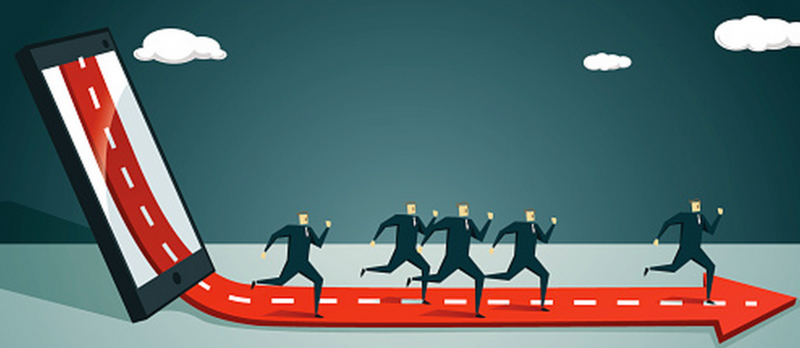

In [138]:
import pandas as pd
import numpy as np
import missingno as m

## Reading Dataset

In [139]:
df = pd.read_csv('telecom_users.csv')
df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes              No  ...  No internet service   
1          Yes            No     Fiber optic  ...                  Yes   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes            No             DSL  ...                   No   
4          Yes            No             DSL  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  

[5 rows x 22 columns]

In [140]:
df.shape

(5986, 22)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [142]:
df.describe()

Unnamed: 0  SeniorCitizen       tenure  MonthlyCharges
count  5986.000000    5986.000000  5986.000000     5986.000000
mean   3533.561310       0.161377    32.468760       64.802213
std    2035.705666       0.367909    24.516391       30.114702
min       0.000000       0.000000     0.000000       18.250000
25%    1777.250000       0.000000     9.000000       35.650000
50%    3546.500000       0.000000    29.000000       70.400000
75%    5291.750000       0.000000    56.000000       89.900000
max    7042.000000       1.000000    72.000000      118.750000

## Data Cleaning

In [143]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

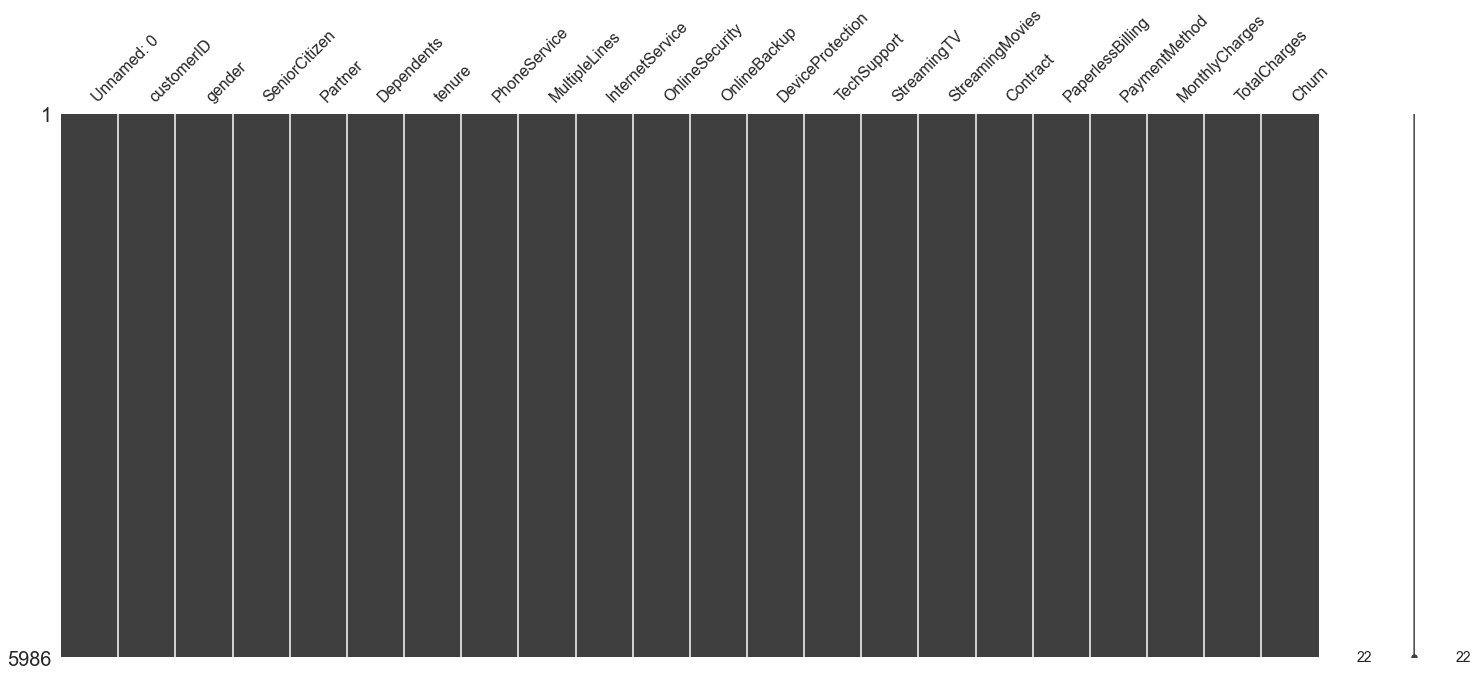

In [144]:
m.matrix(df)

In [145]:
df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes              No  ...  No internet service   
1          Yes            No     Fiber optic  ...                  Yes   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes            No             DSL  ...                   No   
4          Yes            No             DSL  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  

[5 rows x 22 columns]

# Data Analysis

In [146]:
df['Unnamed: 0'].unique()

array([1869, 4528, 6344, ..., 5226, 5390,  860], dtype=int64)

In [147]:
df['customerID'].unique()

array(['7010-BRBUU', '9688-YGXVR', '9286-DOJGF', ..., '8044-BGWPI',
       '7450-NWRTR', '4795-UXVCJ'], dtype=object)

In [148]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [149]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [150]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [151]:
df['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [152]:
df['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [153]:
df['InternetService'].unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

In [154]:
df['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Bank transfer (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [155]:
df = df.drop(columns=['Unnamed: 0','customerID'])

In [156]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes        Yes      72          Yes   
1  Female              0      No         No      44          Yes   
2  Female              1     Yes         No      38          Yes   
3    Male              0      No         No       4          Yes   
4    Male              0      No         No       2          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes              No  No internet service  No internet service   
1            No     Fiber optic                   No                  Yes   
2           Yes     Fiber optic                   No                   No   
3            No             DSL                   No                   No   
4            No             DSL                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service        Two year               No   
1                   No  Month-to-month              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month              Yes   
4                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

# Univariate, Bivariate and Multivariate Analysis 

<AxesSubplot:xlabel='Churn', ylabel='count'>

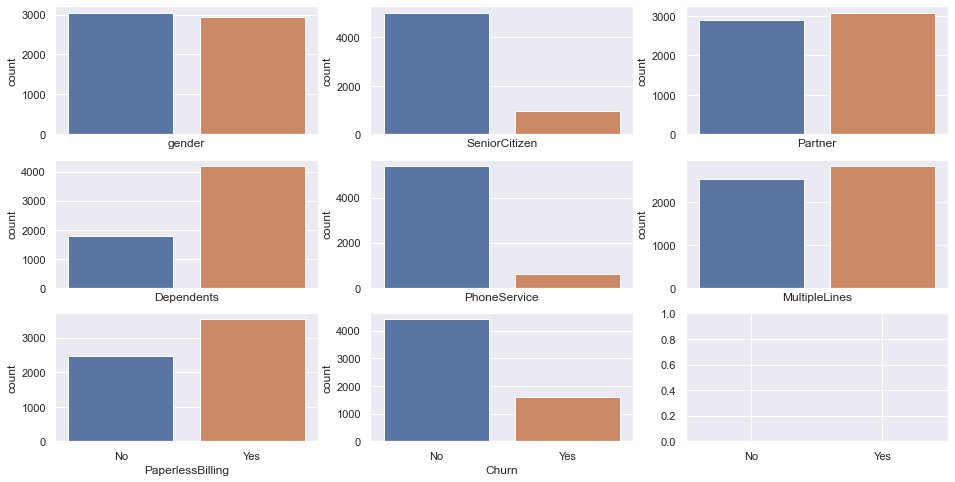

In [157]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x='gender',data = df)
sns.countplot(ax=axes[0,1],x='SeniorCitizen',data = df)
sns.countplot(ax=axes[0,2],x='Partner',data = df)
sns.countplot(ax=axes[1,0],x='Dependents',data = df)
sns.countplot(ax=axes[1,1],x='PhoneService',data = df)
sns.countplot(ax=axes[1,2],x='MultipleLines',data = df)
sns.countplot(ax=axes[2,0],x='PaperlessBilling',data = df)
sns.countplot(ax=axes[2,1],x='Churn',data = df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

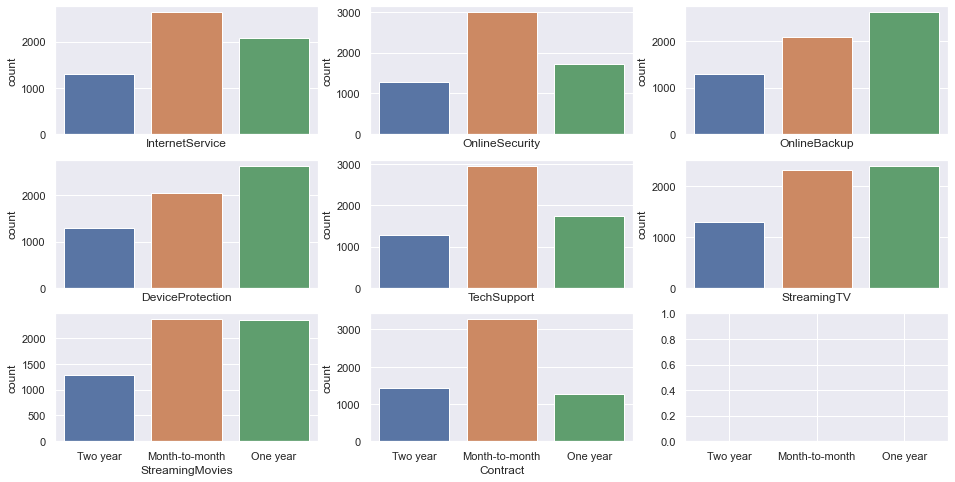

In [168]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x='InternetService',data = df)
sns.countplot(ax=axes[0,1],x='OnlineSecurity',data = df)
sns.countplot(ax=axes[0,2],x='OnlineBackup',data = df)
sns.countplot(ax=axes[1,0],x='DeviceProtection',data = df)
sns.countplot(ax=axes[1,1],x='TechSupport',data = df)
sns.countplot(ax=axes[1,2],x='StreamingTV',data = df)
sns.countplot(ax=axes[2,0],x='StreamingMovies',data = df)
sns.countplot(ax=axes[2,1],x='Contract',data = df)

In [158]:
fig = px.box(df, x="InternetService",y='MonthlyCharges',color='Churn',points='all',title=
             'Churn with InternetService and Monthly Charges')
fig.show()

In [159]:
import plotly.express as px
fig = px.box(df, x="InternetService",y='TotalCharges',points='all',color='Churn',title=
             'Chrun with InternetService and Total Charges')
fig.show()

In [160]:
fig = px.violin(df, x="PaymentMethod",y='MonthlyCharges',points='all',color='Churn',box=True,title=
             'Chrun with PaymentMethod and Total Charges')
fig.show()

In [161]:
fig = px.violin(df, x="PaymentMethod",y='TotalCharges',points='all',color='Churn',box=True,title=
             'Chrun with PaymentMethod and Total Charges')
fig.show()

In [162]:
fig = px.box(df, x="Contract",y='MonthlyCharges',color='Churn',title=
             'Chrun with Contract and MonthlyCharges')
fig.show()

In [163]:
fig = px.box(df, x="Contract",y='TotalCharges',color='Churn',title=
             'Chrun with Contract and Total Charges')
fig.show()

In [165]:
fig = px.scatter(df, x="MonthlyCharges", y="TotalCharges", color="Churn",title='Churn detection with Monthly Charges and Total Charges')
               
fig.show()

# Label Encoding 

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn'])


In [167]:
fig = px.scatter_3d(df, x="MonthlyCharges", y="TotalCharges", z='tenure',
              color='Churn', size='SeniorCitizen', size_max=18,
              symbol='gender', opacity=0.7,title='3D Plot')
fig.show()

# Heatmap

<AxesSubplot:>

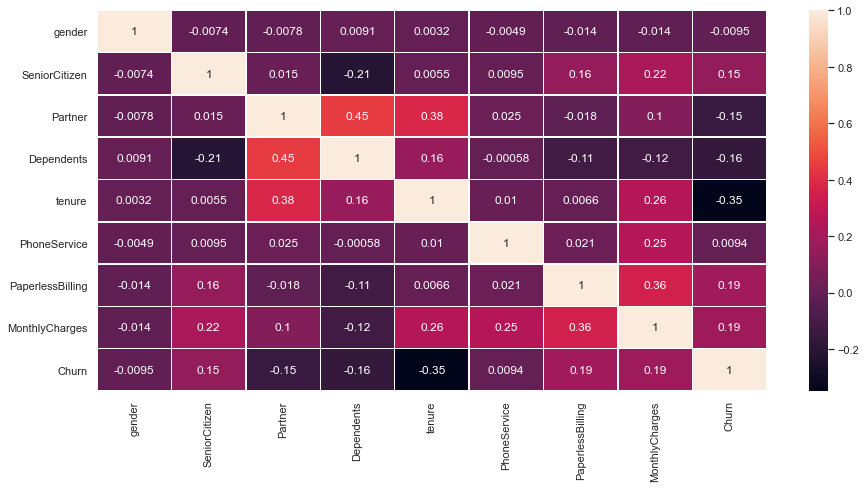

In [170]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),annot= True, linewidth=0.5)

In [171]:
df.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   
5       0              0        1           0      70             0   
6       0              0        0           0      33             1   
7       0              0        0           0       1             0   
8       1              0        0           0      39             0   
9       1              1        0           0      55             1   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0               Yes              No  No internet service  No internet service   
1                No     Fiber optic                   No                  Yes   
2               Yes     Fiber optic                   No                   No   
3                No             DSL                   No                   No   
4                No             DSL                  Yes                   No   
5  No phone service             DSL                  Yes                   No   
6               Yes     Fiber optic                  Yes                   No   
7  No phone service             DSL                   No                   No   
8  No phone service             DSL                   No                   No   
9               Yes     Fiber optic                  Yes                  Yes   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   
5                  Yes                  Yes                   No   
6                   No                   No                   No   
7                   No                   No                   No   
8                  Yes                  Yes                   No   
9                  Yes                  Yes                  Yes   

       StreamingMovies        Contract  PaperlessBilling  \
0  No internet service        Two year                 0   
1                   No  Month-to-month                 1   
2                   No  Month-to-month                 1   
3                  Yes  Month-to-month                 1   
4                   No  Month-to-month                 0   
5                  Yes        Two year                 1   
6                  Yes  Month-to-month                 1   
7                   No  Month-to-month                 1   
8                   No        One year                 0   
9                  Yes  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  
0    Credit card (automatic)           24.10      1734.65      0  
1    Credit card (automatic)           88.15       3973.2      0  
2  Bank transfer (automatic)           74.95      2869.85      1  
3           Electronic check           55.90        238.5      0  
4           Electronic check           53.45        119.5      0  
5  Bank transfer (automatic)           49.85       3370.2      0  
6           Electronic check           90.65       2989.6      0  
7               Mailed check           24.90         24.9      0  
8               Mailed check           35.55      1309.15      0  
9           Electronic check          116.50      6382.55      0

# Making Dummy Variable 

In [172]:
df = pd.get_dummies(df, columns = ['MultipleLines'])
df = pd.get_dummies(df, columns = ['InternetService'])
df = pd.get_dummies(df, columns = ['OnlineSecurity'])
df = pd.get_dummies(df, columns = ['OnlineBackup'])
df = pd.get_dummies(df, columns = ['DeviceProtection'])
df = pd.get_dummies(df, columns = ['TechSupport'])
df = pd.get_dummies(df, columns = ['StreamingTV'])
df = pd.get_dummies(df, columns = ['StreamingMovies'])
df = pd.get_dummies(df, columns = ['Contract'])
df = pd.get_dummies(df, columns = ['PaymentMethod'])

In [173]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn  ...  \
0                 0           24.10      1734.65      0  ...   
1                 1           88.15       3973.2      0  ...   
2                 1           74.95      2869.85      1  ...   
3                 1           55.90        238.5      0  ...   
4                 0           53.45        119.5      0  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   0                                    1   
1                   1                                    0   
2                   1                                    0   
3                   0                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        0                  0   
1                    0                        1                  0   
2                    0                        1                  0   
3                    1                        1                  0   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  1                                        0   
1                  0                                        0   
2                  0                                        1   
3                  0                                        0   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      1                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               1   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 41 columns]

In [174]:
df.tenure = pd.to_numeric(df.tenure, errors='coerce').fillna(0).astype(np.int64)
df.MonthlyCharges = pd.to_numeric(df.MonthlyCharges, errors='coerce').fillna(0).astype(np.int64)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0).astype(np.int64)

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['tenure','MonthlyCharges','TotalCharges']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [176]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           1  1.000000             1   
1       0              0        0           0  0.611111             1   
2       0              1        1           0  0.527778             1   
3       1              0        0           0  0.055556             1   
4       1              0        0           0  0.027778             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 0            0.06      0.199678      0  ...   
1                 1            0.70      0.457508      0  ...   
2                 1            0.56      0.330378      1  ...   
3                 1            0.37      0.027407      0  ...   
4                 0            0.35      0.013703      0  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   0                                    1   
1                   1                                    0   
2                   1                                    0   
3                   0                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        0                  0   
1                    0                        1                  0   
2                    0                        1                  0   
3                    1                        1                  0   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  1                                        0   
1                  0                                        0   
2                  0                                        1   
3                  0                                        0   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      1                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               1   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 41 columns]

# Devide into X and y

In [177]:
y = df['Churn']
X = df.drop(columns = ['Churn'])

In [178]:
X.shape

(5986, 40)

In [179]:
y.shape

(5986,)

# Train Test Split

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Building KNN Classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 60, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=60)

In [182]:
y_test = y_test.values

# Prediction

In [190]:
y_pred = classifier.predict(X_test)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
data

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [1, 1],
       [0, 1],
       [0, 0]])

# Confusion Matrix

In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[962 132]
 [167 236]]


<AxesSubplot:>

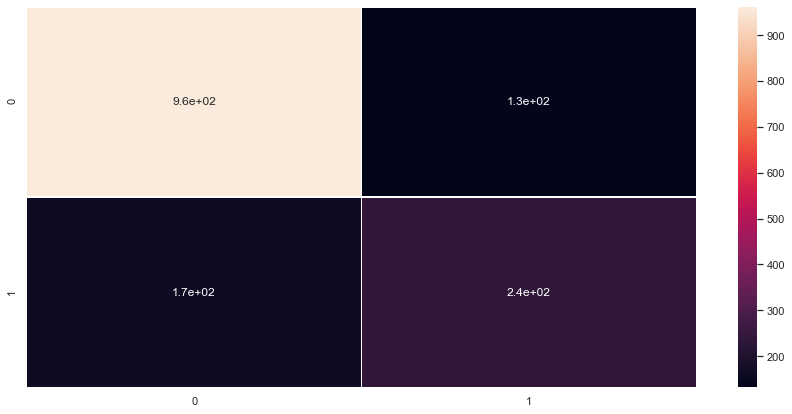

In [185]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,
            linewidths=.5)

# Accuracy and Classification Report

In [186]:
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.8002672010688042


In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1094
           1       0.64      0.59      0.61       403

    accuracy                           0.80      1497
   macro avg       0.75      0.73      0.74      1497
weighted avg       0.80      0.80      0.80      1497



In [191]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')
dataset = pd.read_csv('accuracy.csv')
dataset

Unnamed: 0  y_test  y_pred
0              0       0       0
1              1       0       0
2              2       0       1
3              3       0       0
4              4       0       0
...          ...     ...     ...
1492        1492       0       0
1493        1493       1       1
1494        1494       1       1
1495        1495       0       1
1496        1496       0       0

[1497 rows x 3 columns]

In [195]:
import plotly.graph_objects as go



fig = go.Figure()
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['y_test'],
                name='Actual',
                marker_color='crimson'
                ))
fig.add_trace(go.Bar(x=dataset['Unnamed: 0'],
                y=dataset['y_pred'],
                name='Predicted',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Actual vs Predicted Value',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

# This Model can CHURN Telecom Users with an Accuracy of 80%